# <center> <font face="Times New Roman"> Statistics of Bird Migration </font></center>

<center> <font face="Times New Roman"> Gracy Whelihan, vgw3869@nyu.edu </font></center> 
<center> <font face="Times New Roman"> Sheeran Yan, zy2053@nyu.edu </font></center>

## <font face="Times New Roman">Read Data</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()
%matplotlib inline

In [3]:
from sklearn.cluster import KMeans

**<font face="Times New Roman">read data from text file</font>**

In [4]:
def read_data(path):
    """
    Read data from text file and return a structured dataframe.
    :param path: str; string of the file path.
    :return: pd.DataFrame; 
    """
    # read data from text
    txt = open(path, "r")
    dict_txt = dict()
    for line in txt:
        line_list = line.split("\t")
        if line_list != ['\n'] and len(line_list) > 2: 
            dict_txt[line_list[0]] = line_list[1:-1]
            
    # create dataframe
    df = pd.DataFrame(dict_txt)
    df.rename(columns={'': 'week'}, inplace=True)
    
    # data preprocessing
    for i in range(len(df.week)):
        if df.week.iloc[i] == '':
            preprocessed_data = df.week.iloc[i - 1].split('_')[0] + '_' + str(i % 4 + 1)
            df.week.iloc[i] = preprocessed_data
        else:
            df.week.iloc[i] = df.week.iloc[i] + '_' + '1'
    
    df.columns = [col.lower().strip() for col in df.columns]
    df.set_index('week', inplace=True)
    df = df.astype(float)
    
    return df

In [16]:
# main data from year 2018 to 2022
txt_migration = open("data/ebird_US-NY__total.txt", "r")

**<font face="Times New Roman">parse data from text file line by line</font>**

In [17]:
dict_migration = dict()
for line in txt_migration:
    line_list = line.split("\t")
    if line_list != ['\n'] and len(line_list) > 2: 
        dict_migration[line_list[0]] = line_list[1:-1]

**<font face="Times New Roman">create DataFrame</font>**

In [18]:
df_migration = pd.DataFrame(dict_migration)
df_migration.rename(columns={'': 'week'}, inplace=True)

**<font face="Times New Roman">data preprocessing</font>**

In [19]:
# preprocess week
for i in range(len(df_migration.week)):
    if df_migration.week.iloc[i] == '':
        preprocessed_data = df_migration.week.iloc[i - 1].split('_')[0] + '_' + str(i % 4 + 1)
        df_migration.week.iloc[i] = preprocessed_data
    else:
        df_migration.week.iloc[i] = df_migration.week.iloc[i] + '_' + '1'

In [20]:
# lower column name 
df_migration.columns = [col.lower().strip() for col in df_migration.columns]

# set month_week as index
df_migration.set_index('week', inplace=True)

# coerce type string to type float
df_migration = df_migration.astype(float)

Q: Sum of freq is not equal to 1?

In [21]:
df_migration.head()

,sample size:,black-bellied whistling-duck,bar-headed goose,emperor goose,snow goose,ross's goose,snow x ross's goose (hybrid),snow/ross's goose,graylag goose,swan goose,...,rose-breasted/black-headed grosbeak,blue grosbeak,indigo bunting,painted bunting,passerina sp.,dickcissel,saffron finch,lined seedeater,passerine sp.,bird sp.
week,,,,,,,,,,,,,,,,,,,,,
Jan_1,37552.0,0.0,0.0,0.0,0.015259,0.001278,0.000107,0.000027,0.000346,0.000000,...,0.0,0.0,0.000000,0.002583,0.0,0.000586,0.0,0.0,0.002769,0.001198
Jan_2,28892.0,0.0,0.0,0.0,0.015818,0.002457,0.000000,0.000069,0.000554,0.000104,...,0.0,0.0,0.000035,0.000762,0.0,0.000000,0.0,0.0,0.002631,0.001454
Jan_3,28728.0,0.0,0.0,0.0,0.018101,0.000940,0.000070,0.000035,0.000696,0.000070,...,0.0,0.0,0.000000,0.000174,0.0,0.000278,0.0,0.0,0.002437,0.001497
Jan_4,36388.0,0.0,0.0,0.0,0.015637,0.000330,0.000028,0.000028,0.000660,0.000028,...,0.0,0.0,0.000000,0.000192,0.0,0.000330,0.0,0.0,0.002886,0.001731
Feb_1,24973.0,0.0,0.0,0.0,0.008689,0.000440,0.000000,0.000000,0.000521,0.000040,...,0.0,0.0,0.000000,0.000080,0.0,0.000040,0.0,0.0,0.002683,0.001602


## <font face="Times New Roman">Read Data Year by Year</font>

In [6]:
dict_df = dict()
# ebird_US-NY__2000_2001.txt
for year in range(2000, 2022):
    dict_df[str(year) + "_" + str(year + 1)] = read_data(f"data/ebird_US-NY__{year}_{year + 1}.txt")

In [7]:
dict_df["2000_2001"].head()

,sample size:,snow goose,ross's goose,swan goose,greater white-fronted goose,domestic goose sp. (domestic type),brant,barnacle goose,cackling goose,canada goose,...,summer tanager,scarlet tanager,western tanager,northern cardinal,rose-breasted grosbeak,blue grosbeak,indigo bunting,dickcissel,passerine sp.,bird sp.
week,,,,,,,,,,,,,,,,,,,,,
Jan_1,150.0,0.020000,0.0000,0.0,0.000000,0.0,0.093333,0.0,0.0,0.226667,...,0.0,0.0,0.0,0.360000,0.0,0.0,0.0,0.0,0.000000,0.0000
Jan_2,111.0,0.018018,0.0015,0.0,0.000000,0.0,0.090090,0.0,0.0,0.126126,...,0.0,0.0,0.0,0.306306,0.0,0.0,0.0,0.0,0.009009,0.0015
Jan_3,99.0,0.010101,0.0000,0.0,0.000000,0.0,0.101010,0.0,0.0,0.191919,...,0.0,0.0,0.0,0.303030,0.0,0.0,0.0,0.0,0.000000,0.0000
Jan_4,137.0,0.036496,0.0000,0.0,0.001500,0.0,0.116788,0.0,0.0,0.167883,...,0.0,0.0,0.0,0.248175,0.0,0.0,0.0,0.0,0.014599,0.0000
Feb_1,124.0,0.024193,0.0000,0.0,0.008065,0.0,0.129032,0.0,0.0,0.185484,...,0.0,0.0,0.0,0.233871,0.0,0.0,0.0,0.0,0.000000,0.0000


## <font face="Times New Roman">Statistics</font>
TODO: describe  
TODO: correlation matrix  
TODO: Year to year: 20 years
..

**<font face="Times New Roman">Statistical Description</font>**   
[Frequency](https://support.ebird.org/en/support/solutions/articles/48000948655-ebird-glossary#anchorF): how often a species is reported on complete checklists within a specified date range and region, measured by percent of checklists reporting the species. Frequency is used is on the eBird Bar Charts and in the purple grids on species maps.

In [29]:
df_describe = df_migration.describe()
df_describe

,sample size:,black-bellied whistling-duck,bar-headed goose,emperor goose,snow goose,ross's goose,snow x ross's goose (hybrid),snow/ross's goose,graylag goose,swan goose,...,rose-breasted/black-headed grosbeak,blue grosbeak,indigo bunting,painted bunting,passerina sp.,dickcissel,saffron finch,lined seedeater,passerine sp.,bird sp.
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,4.800000e+01,48.000000,48.000000,48.000000,4.800000e+01,48.000000,48.000000,48.000000,48.000000,48.000000
mean,32168.666667,0.000569,0.000036,0.000039,0.009886,0.000598,0.000016,0.000090,0.000394,0.000133,...,8.020833e-07,0.000833,0.032231,0.000283,3.458333e-07,0.001203,0.000005,0.000009,0.004737,0.002263
std,11150.947649,0.000940,0.000217,0.000220,0.011103,0.000791,0.000038,0.000303,0.000266,0.000359,...,5.556996e-06,0.000995,0.043941,0.000741,2.396004e-06,0.001576,0.000019,0.000027,0.002656,0.000627
min,16868.000000,0.000000,0.000000,0.000000,0.000584,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.002076,0.001198
25%,24947.500000,0.000000,0.000000,0.000000,0.002145,0.000000,0.000000,0.000000,0.000239,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000144,0.000000,0.000000,0.002876,0.001800
50%,28945.500000,0.000000,0.000000,0.000000,0.006999,0.000319,0.000000,0.000000,0.000336,0.000036,...,0.000000e+00,0.000470,0.004558,0.000000,0.000000e+00,0.000527,0.000000,0.000000,0.003364,0.002177
75%,35631.250000,0.000811,0.000000,0.000000,0.015311,0.001035,0.000000,0.000037,0.000485,0.000065,...,0.000000e+00,0.001320,0.055038,0.000142,0.000000e+00,0.001605,0.000000,0.000000,0.005946,0.002630
max,61022.000000,0.003549,0.001500,0.001500,0.052349,0.003242,0.000198,0.001500,0.001329,0.001500,...,3.850000e-05,0.004019,0.121728,0.003616,1.660000e-05,0.007203,0.000121,0.000114,0.011468,0.004140


Spring especially April and May are the best months for birding, pleasant weather is one of the most important reason leads to birds' active ativities.

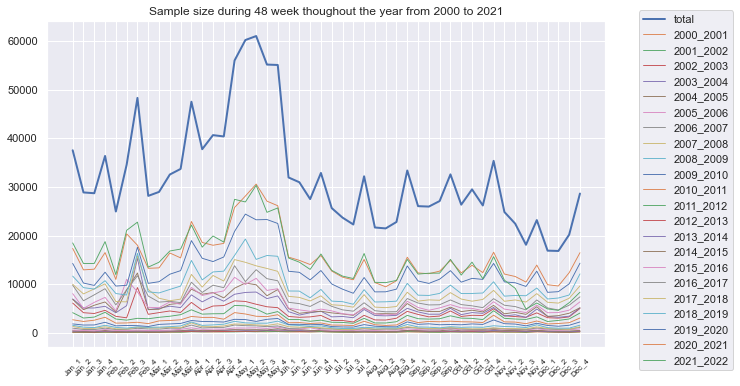

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(df_migration["sample size:"], label="total", linewidth=2.0)

for key in dict_df.keys():
    plt.plot(dict_df[key]["sample size:"], label=key, linewidth=0.9)

plt.title("Sample size during 48 week thoughout the year from 2000 to 2021", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1.05))
plt.xticks(fontsize=8, rotation=45)
plt.show()

Easiest and hardest birds to spot

In [31]:
df_freq_sort = df_migration.iloc[:, 1:].mean(axis=0).sort_values()
print(f"top 5 easiest birds to spot.\n{df_freq_sort.iloc[-5:]}")
print("\n")
print(f"top 5 rarest birds to spot.\n{df_freq_sort.iloc[:5]}")

top 5 easiest birds to spot.
mourning dove             0.382968
black-capped chickadee    0.384682
american robin            0.428848
northern cardinal         0.442445
blue jay                  0.468619
dtype: float64


top 5 rarest birds to spot.
passerina sp.               3.458333e-07
laughing/franklin's gull    3.770833e-07
south african shelduck      3.791667e-07
pheasant sp.                4.312500e-07
columba sp.                 4.375000e-07
dtype: float64


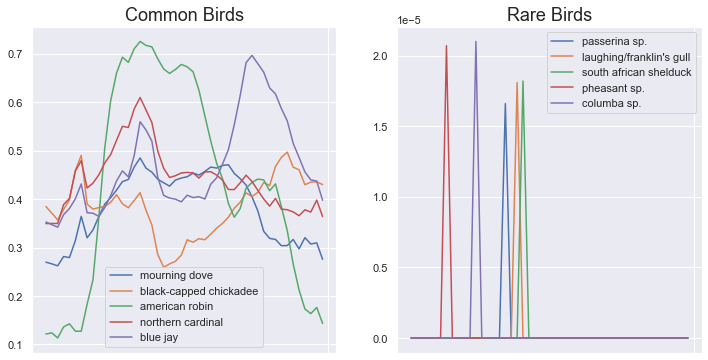

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for common_bird in df_freq_sort.iloc[-5:].index:
    axes[0].plot(df_migration[common_bird], label=common_bird)
axes[0].set_title('Common Birds', fontsize=18)
axes[0].set_xticks('')
axes[0].legend()

for rare_bird in df_freq_sort.iloc[:5].index:
    axes[1].plot(df_migration[rare_bird], label=rare_bird)
axes[1].set_title('Rare Birds', fontsize=18)
axes[1].set_xticks('')
axes[1].legend()

plt.show()

**<font face="Times New Roman">Correlation Matrix</font>**

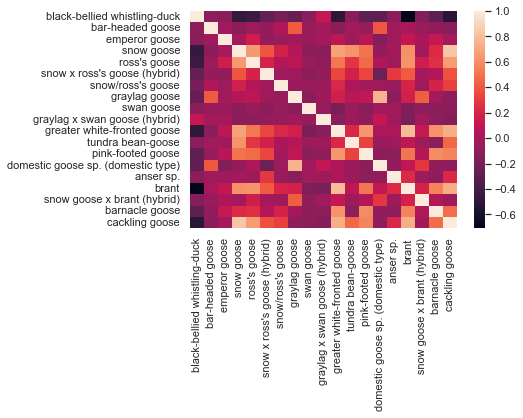

In [33]:
# calculate the correlation matrix for the first 20 species
corr = df_migration.iloc[:, 1:20].corr()

# plot the heatmap
sns.heatmap(
    corr, 
    xticklabels=corr.columns,
    yticklabels=corr.columns
)
plt.show()

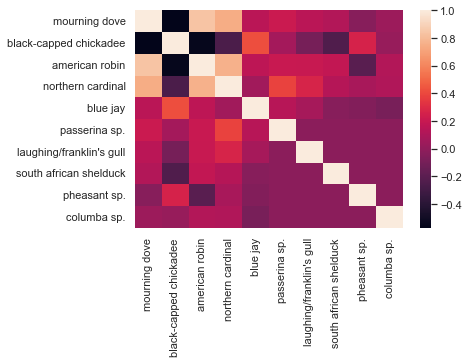

In [34]:
# calculate the correlation matrix for the rarest and easiest species to spot.
col_top_birds = [col for col in df_freq_sort.iloc[-5:].index] + [col for col in df_freq_sort.iloc[:5].index]
corr = df_migration[col_top_birds].corr()  #  + df_freq_sort.iloc[:5].index

# plot the heatmap
sns.heatmap(
    corr, 
    xticklabels=corr.columns,
    yticklabels=corr.columns
)
plt.show()

## <font face="Times New Roman">Clusters</font>
TODO: K-means  
..

**<font face="Time New Roman">Clustering from a time series point of view</font>**

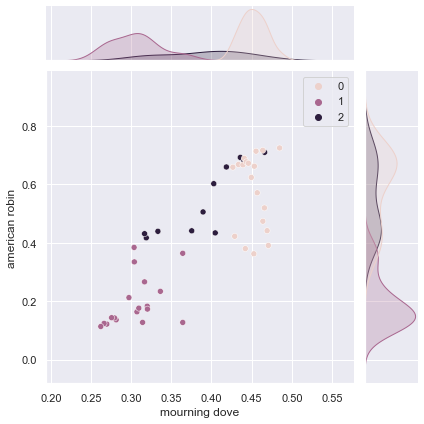

In [35]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_migration.iloc[:, 1:])
sns.jointplot(data=df_migration.iloc[:, 1:], x="mourning dove", y="american robin", hue=kmeans.labels_) #, kind="kde")
plt.show()

In [36]:
df_test = df_migration.reset_index()

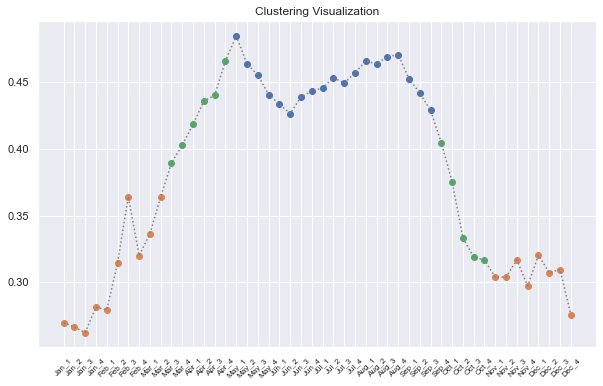

In [37]:
plt.figure(figsize=(10, 6))

plt.plot(df_test["mourning dove"], color="grey", linestyle=":")
for i in range(3):
    series = df_test.loc[kmeans.labels_ == i, "mourning dove"]
    plt.scatter(series.index, series.values)

plt.title("Clustering Visualization", fontsize=12)
plt.xticks(range(len(df_migration.index)), df_migration.index, rotation=45, fontsize=8)
plt.show()

**<font face="Time New Roman">Clustering from a cross sectional point of view</font>**

In [18]:
# kmeans = KMeans(n_clusters=5, random_state=0).fit(df_migration.iloc[:, 1:].T)
# sns.jointplot(data=df_migration.iloc[:, 1:].T, x="May_1", y="Dec_1", hue=kmeans.labels_) #, kind="kde")